<a href="https://colab.research.google.com/github/Bryx-Hernandez/Personal-Projects/blob/main/Project1_UdemyCourses_PYCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVES OF THE ANALYTICS

1. Describe the most performing courses on Udemy from 2020 onwards under the "Health and Fitness" Category.
2. Explore the factors why these courses perform well.


# METHODS
I.
1. Determine which courses perform well using plots.

II.
1. Determine which features with significant correlation/association with the number of subscribers.
2. Summarize the findings using a heatmap.
3. Attempt to construct the "best" model that would describe the factors why the courses became successfull. In order to have a balanced data for modeling, we could randomly select underperforming courses and label them accordingly.

Methods that could be used:
1. Logistic Regression
2. Probit Regression
3. Decision Tree and Random Forest
4. Regression Tree

RESULTS:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from statsmodels.tsa.stattools import adfuller

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scipy import stats

from matplotlib.colors import ListedColormap
from datetime import datetime

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

In [ ]:
# Read CSV file and convert timestamp to datetime.
data = pd.read_csv('drive/My Drive/Course_info.csv').dropna()
data['published_time'] = pd.to_datetime(data['published_time'])

# Store dates from last_update_date if there is data; otherwise, use date from published_time.
data['dates'] = data['last_update_date'].fillna(data['published_time'])

# Include health and fitness related courses with latest updates from 2020 onwards.
data2 = data[(data['last_update_date']>='2020-01-01') & (data['published_time']>='2020-01-01') & (data['category'] == 'Health & Fitness') & (data['num_subscribers'] != 0)]

data3 = data2[data2['num_subscribers'] >= data2['num_subscribers'].quantile(0.85)]

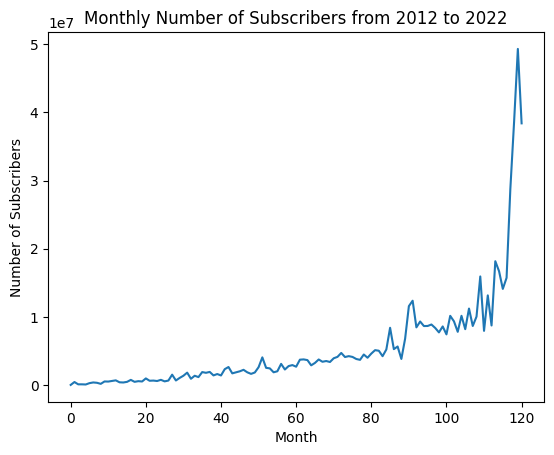

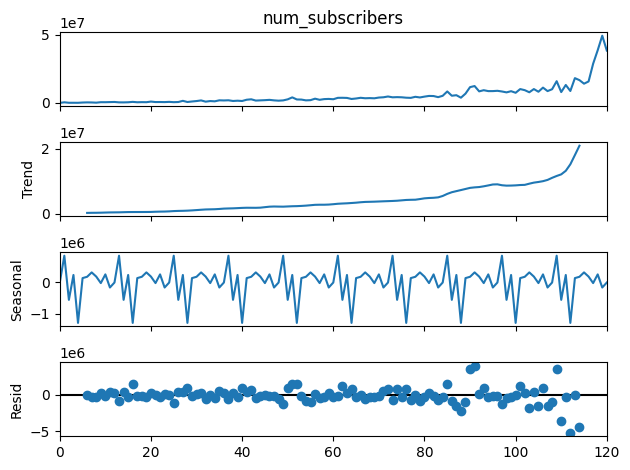

In [ ]:
data.loc[:, 'year'] = pd.to_datetime(data['dates']).dt.year
data.loc[:, 'month'] = pd.to_datetime(data['dates']).dt.month
data.loc[:, 'day'] = pd.to_datetime(data['dates']).dt.day

data.loc[:, 'day_num'] = datetime(2022, 10, 10) - pd.to_datetime(data['dates'])
monthly_sub1 = data.groupby(['year', 'month']).agg({'num_subscribers': 'sum'}).reset_index()

decomposition = seasonal_decompose(monthly_sub1['num_subscribers'], model='additive', period=12)

plt.plot(monthly_sub1.index, monthly_sub1['num_subscribers'])
plt.title("Monthly Number of Subscribers from 2012 to 2022")
plt.xlabel("Month")
plt.ylabel("Number of Subscribers")
plt.show

decomposition.plot()
plt.show()

In [ ]:
monthly_sub1.sort_values(by = 'num_subscribers', ascending = False)

,year,month,num_subscribers
119,2022,9,49334560.0
118,2022,8,38631887.0
120,2022,10,38406414.0
117,2022,7,28751940.0
113,2022,3,18164887.0
...,...,...,...
8,2013,6,157347.0
2,2012,12,87669.0
3,2013,1,87027.0
4,2013,2,63978.0


In [ ]:
data['day_num'].sort_values(ascending = True)

,day_num
149165,0 days
188491,0 days
84236,0 days
106383,0 days
205207,0 days
...,...
490,3626 days
386,3627 days
502,3629 days
78,3629 days


In [ ]:
monthly_sub1.sort_values(by = 'num_subscribers', ascending = False)
data.columns


Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url', 'dates', 'year', 'month', 'day', 'day_num'],
      dtype='object')

In [ ]:
data2.loc[:, 'year'] = pd.to_datetime(data2['dates']).dt.year
data2.loc[:, 'month'] = pd.to_datetime(data2['dates']).dt.month
data2.loc[:, 'day'] = pd.to_datetime(data2['dates']).dt.day

/tmp/ipython-input-2273395075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, 'year'] = pd.to_datetime(data2['dates']).dt.year
/tmp/ipython-input-2273395075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, 'month'] = pd.to_datetime(data2['dates']).dt.month
/tmp/ipython-input-2273395075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

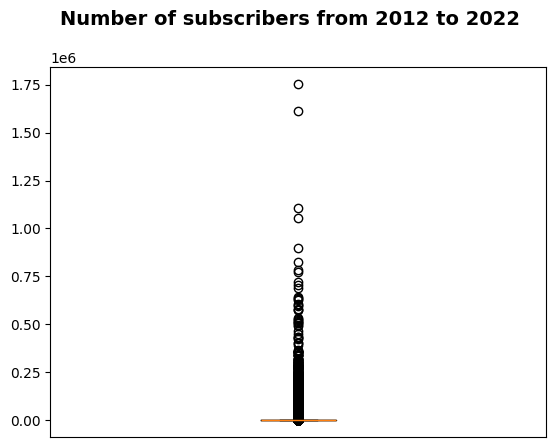

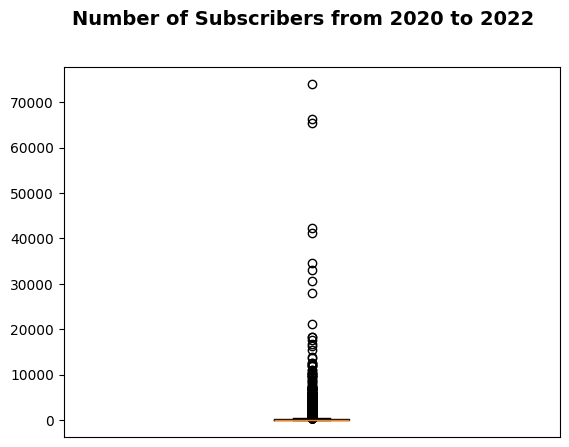

((208186, 25), (6992, 24))

In [ ]:
plt.boxplot(data['num_subscribers'])
plt.suptitle("Number of subscribers from 2012 to 2022", x= 0.5, y=1, fontweight='bold', fontsize=14)
plt.xticks([])
plt.show()

plt.boxplot(data2['num_subscribers'])
plt.suptitle("Number of Subscribers from 2020 to 2022", x= 0.5, y=1, fontweight='bold', fontsize=14)
plt.xticks([])
plt.show()

data.shape, data2.shape



In [ ]:
data3.loc[:, 'year'] = pd.to_datetime(data3['last_update_date']).dt.year
data3.loc[:, 'month'] = pd.to_datetime(data3['last_update_date']).dt.month
data3.loc[:, 'day'] = pd.to_datetime(data3['last_update_date']).dt.day

/tmp/ipython-input-2508169514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.loc[:, 'year'] = pd.to_datetime(data3['last_update_date']).dt.year
/tmp/ipython-input-2508169514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.loc[:, 'month'] = pd.to_datetime(data3['last_update_date']).dt.month
/tmp/ipython-input-2508169514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
def count_outliers_iqr(data):
    """
    Calculates the number of outliers in a dataset using the IQR method.

    Args:
        data (list or numpy.array): The dataset to analyze.

    Returns:
        int: The number of outliers found.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers)

print(count_outliers_iqr(data['num_subscribers']))
print(count_outliers_iqr(data2['num_subscribers']))

31029
1075


In [ ]:
monthly_sub = data3.groupby(['year', 'month']).agg({'num_subscribers': 'sum'}).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

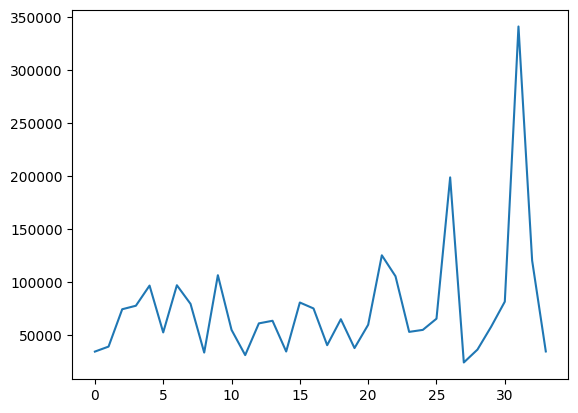

In [ ]:
plt.plot(monthly_sub.index, monthly_sub['num_subscribers'])
plt.show

In [ ]:
monthly_sub['date'] = pd.to_datetime(monthly_sub[['year', 'month']].assign(day=1))
monthly_sub = monthly_sub.set_index('date')
monthly_sub = monthly_sub['num_subscribers']

sub_ts = pd.DataFrame(monthly_sub)

In [ ]:
# Number of Subscribers from 2020 is Stationary.

result = adfuller(sub_ts['num_subscribers'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.05016032226501612
p-value: 0.9624888875948349
Critical Values: {'1%': np.float64(-3.6790595944893187), '5%': np.float64(-2.9678817237279103), '10%': np.float64(-2.6231583472057074)}


In [ ]:
non_performing = data2[-data2['id'].isin(data3['id'])]
non_performing.shape

(5940, 24)

In [ ]:
Fitness = ['Yoga', 'Fitness', 'Meditation']
Martial_Arts_and_Sports = ['Martial Arts & Self Defense', 'Sports', 'Dance']

data3['subcategory'].loc[data3['subcategory'].isin(Fitness)] = 'Fitness'
data3['subcategory'].loc[data3['subcategory'].isin(Martial_Arts_and_Sports)] = 'Martial Arts & Sports'

/tmp/ipython-input-1464252767.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data3['subcategory'].loc[data3['subcategory'].isin(Fitness)] = 'Fitness'
/tmp/ipython-input-1464252767.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
model_data = data3.drop(columns = ['title', 'headline', 'course_url', 'category', 'topic',
                                   'instructor_name', 'instructor_url', 'last_update_date', 'published_time', 'dates']).sort_values(by = 'num_subscribers', ascending = False)
model_data2 = non_performing.drop(columns = ['title', 'headline', 'course_url', 'category', 'topic',
                                   'instructor_name', 'instructor_url', 'last_update_date', 'published_time', 'dates']).sort_values(by = 'num_subscribers', ascending = False)

random.seed(100)

model_data['is_performing'] = True
model_data2['is_performing'] = False
final_data = pd.concat([model_data, model_data2])

X = final_data.drop(columns = 'is_performing')
y = final_data['is_performing']

X_coded = pd.get_dummies(X)


In [ ]:
final_data.shape
final_data = final_data.drop(columns = ['id'])
final_data.to_csv('final_data', index = False)

In [ ]:
final_data.columns

Index(['is_paid', 'price', 'num_subscribers', 'avg_rating', 'num_reviews',
       'num_comments', 'num_lectures', 'content_length_min', 'subcategory',
       'language', 'year', 'month', 'day', 'is_performing'],
      dtype='object')

In [ ]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(final_data['is_paid'], final_data['is_performing'])
print("Contingency Table:\n", contingency_table)

# ----- 2️⃣ Perform Chi-Square Test -----
chi2, p, dof, expected = chi2_contingency(contingency_table)

# ----- 3️⃣ Display Results -----
print("\nChi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
print("\nExpected frequencies:\n", expected)

n = 58 + 379 + 994 + 673
k = 2
cramers_v = np.sqrt(chi2 / (n * (k - 1)))
print(cramers_v)


Contingency Table:
 is_performing  False  True 
is_paid                    
False            355    379
True            5585    673

Chi-square statistic: 855.7515218475879
Degrees of freedom: 1
P-value: 4.0848704301954066e-188

Expected frequencies:
 [[ 623.56407323  110.43592677]
 [5316.43592677  941.56407323]]
0.637750741655934


In [ ]:
from statsmodels.stats.contingency_tables import Table

In [ ]:
# Create contingency table — still works with strings
ct = pd.crosstab(final_data['is_performing'], final_data['language'])
print("Contingency Table:\n", ct)

# Perform Fisher–Freeman–Halton test (generalized Fisher’s)
result = Table(ct).test_nominal_association()

print("\nTest results:")
print(result)

# Cramér's V
tab = Table(ct)
n = ct.to_numpy().sum()
min_dim = 1
cramers_v = np.sqrt(304 / (n * min_dim - 1))

print(f"Cramér's V = {cramers_v:.3f}")

Contingency Table:
 language       Albanian  Arabic  Azeri  Bulgarian  Croatian  Dutch  English  \
is_performing                                                                 
False                 3      96      3          1         2     16     3241   
True                  0      16      0          0         0      0      831   

language       Filipino  French  German  ...  Serbian  Simplified Chinese  \
is_performing                            ...                                
False                 3     170     372  ...        5                  50   
True                  0       6      28  ...        0                   0   

language       Spanish  Swedish  Tamil  Thai  Traditional Chinese  Turkish  \
is_performing                                                                
False              615        3      5     5                   22       86   
True                69        0      0     0                    0       40   

language       Ukrainian  Urdu  
is_perfo

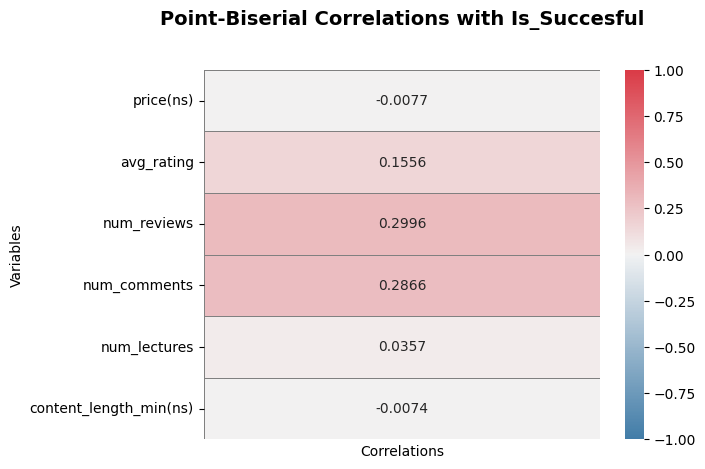

In [ ]:
numerical = ['price', 'avg_rating', 'num_reviews', 'num_comments', 'num_lectures', 'content_length_min']
pb_corr = pd.DataFrame(columns = ['col', 'correlation', 'p_value'])

for col in numerical:
  correlation, p_value = pointbiserialr(final_data[col], final_data['is_performing'])
  if p_value > 0.05:
    col = col + '(ns)'
  pb_corr.loc[len(pb_corr)] = [col, correlation, p_value]

pb_corr['masked_corr'] = pb_corr['correlation'].where(pb_corr['p_value'] < 0.05, 0)
heat_data = pb_corr[['masked_corr']].set_index(pb_corr['col'])

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(
    heat_data,
    annot = pb_corr[['correlation']].values,  # show actual correlation values
    fmt="0.4f",
    cmap=cmap,
    center=0,
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    vmin=-1, vmax=1
)

plt.title("Point-Biserial Correlations with Is_Succesful", x= 0.5, y=1.1, fontweight='bold', fontsize=14)
plt.ylabel('Variables')
plt.xlabel('Correlations')
plt.xticks([])
plt.show()

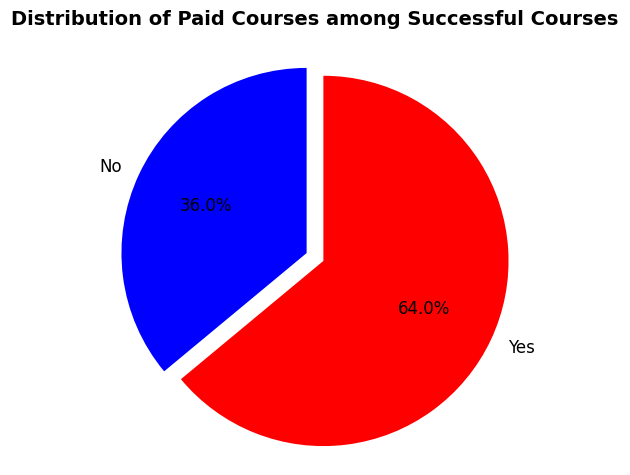

In [ ]:
# Create the pie chart
is_paid_counts = final_data.groupby('is_paid').agg({'is_performing': 'sum'}).reset_index()
plt.pie(is_paid_counts['is_performing'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors = ['blue', 'red'],
        explode=(0.05, 0.05), textprops={'color': 'black', 'fontsize': 12})

# Add a title
plt.suptitle("Distribution of Paid Courses among Successful Courses", fontweight='bold', fontsize=14)

# Ensure the circle is drawn properly
plt.axis('equal')

plt.tight_layout()

# Display the chart
plt.show()

In [ ]:
is_paid_counts

,is_paid,is_performing
0,False,379
1,True,673


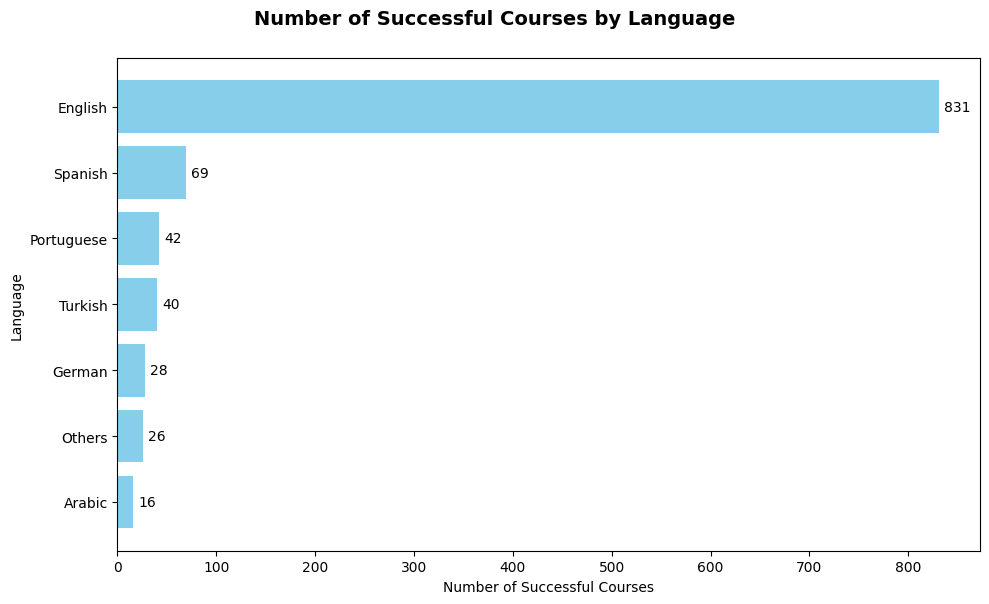

In [ ]:
language_counts = final_data.groupby('language').agg({'is_performing': 'sum'}).sort_values(by = 'is_performing').reset_index()

# Group languages with less than 10 successful courses as 'Others'
language_counts['language'] = np.where(language_counts['is_performing'] < 10, 'Others', language_counts['language'])

# Recalculate the counts after grouping
language_counts = language_counts.groupby('language').agg({'is_performing': 'sum'}).reset_index().sort_values(by='is_performing')


plt.figure(figsize=(10, 6))
bars = plt.barh(language_counts['language'], language_counts['is_performing'], color='skyblue')
plt.xlabel("Number of Successful Courses")
plt.ylabel("Language")
plt.suptitle("Number of Successful Courses by Language", fontweight='bold', fontsize=14, y = 1)

# Add frequencies to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width}',
             va='center')

plt.tight_layout()
plt.show()

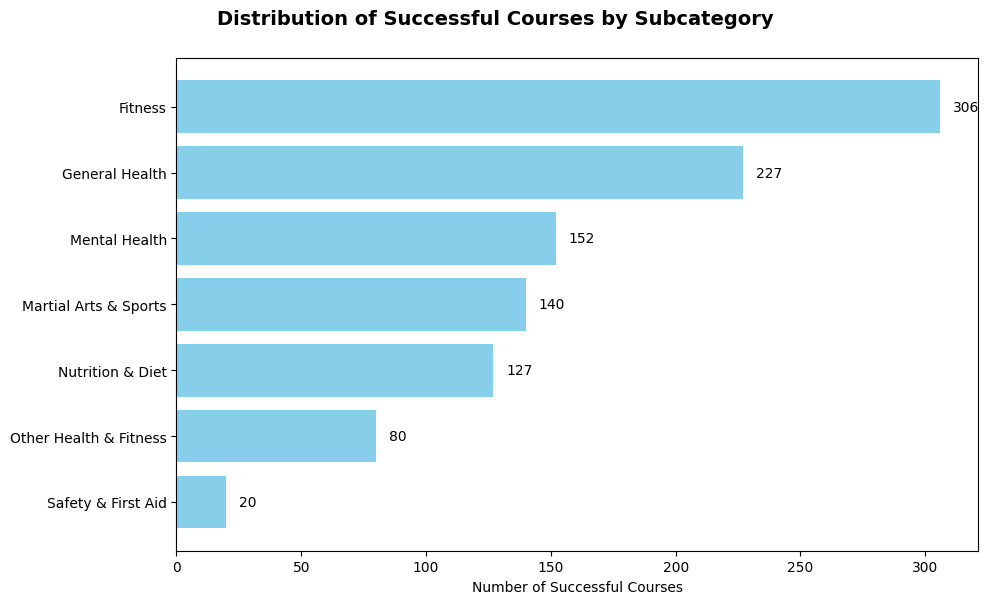

In [ ]:
# Recalculate the counts after grouping
subcategory_counts = final_data.groupby('subcategory').agg({'is_performing': 'sum'}).reset_index().sort_values(by='is_performing')

# Filter out subcategories with 0 successful courses
subcategory_counts = subcategory_counts[subcategory_counts['is_performing'] > 0]

plt.figure(figsize=(10, 6))
bars = plt.barh(subcategory_counts['subcategory'], subcategory_counts['is_performing'], color='skyblue')
plt.xlabel("Number of Successful Courses")
plt.suptitle("Distribution of Successful Courses by Subcategory", fontweight='bold', fontsize=14, y = 1)

# Add frequencies to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width}',
             va='center')

plt.tight_layout()
plt.show()

In [ ]:
from importlib import reload
plt=reload(plt)

In [ ]:
language_counts.sort_values('is_performing', ascending=False)

,language,is_performing
1,English,831
5,Spanish,69
4,Portuguese,42
6,Turkish,40
2,German,28
3,Others,26
0,Arabic,16


In [ ]:
# minority_count = len(model_data)

# # Resampling using SMOTE
# # Sampling strategy was devised to lessen the majority class and distribute it to the other minority class
# smote_init = SMOTE(sampling_strategy = {0: minority_count, 1: minority_count}, random_state = 100)

# # To avoid synthetic samples that would be considered as noise, SMOTE-ENN (Edited Nearest Neighbor) was used
# smote_enn = make_pipeline(SimpleImputer(strategy = "most_frequent"), SMOTEENN(smote = smote_init, sampling_strategy = {0: minority_count, 1: minority_count}))
# x_smote_coded, y_smote = smote_enn.fit_resample(X_coded, y)

# # Creation of training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_coded, y)

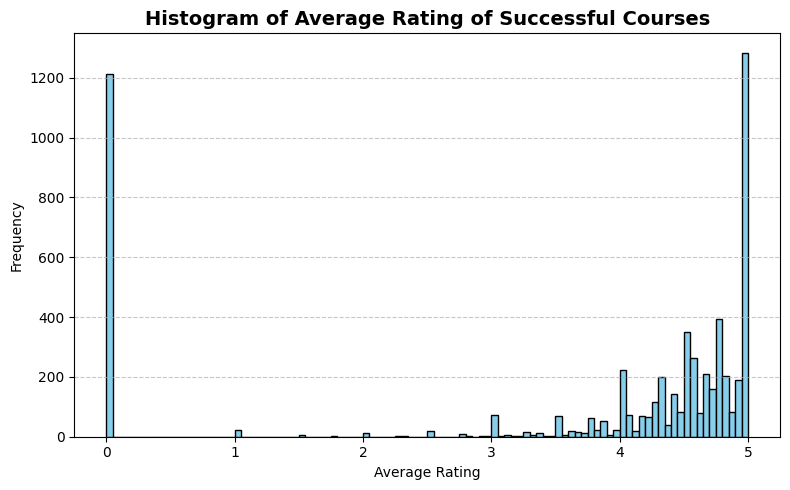

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(model_data2['avg_rating'], bins=100, color='skyblue', edgecolor='black')

plt.title('Histogram of Average Rating of Successful Courses', fontsize=14, fontweight='bold')

plt.xlabel("Average Rating")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

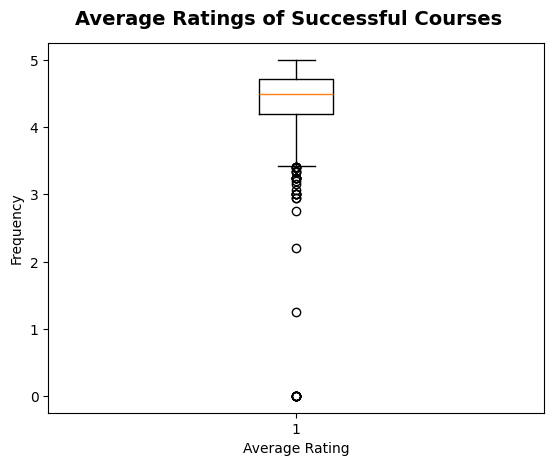

In [ ]:
### AVERAGE RATING

model_data['avg_rating'].describe()

plt.boxplot(model_data['avg_rating'])
plt.suptitle("Average Ratings of Successful Courses", x= 0.5, y=0.95, fontweight='bold', fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()



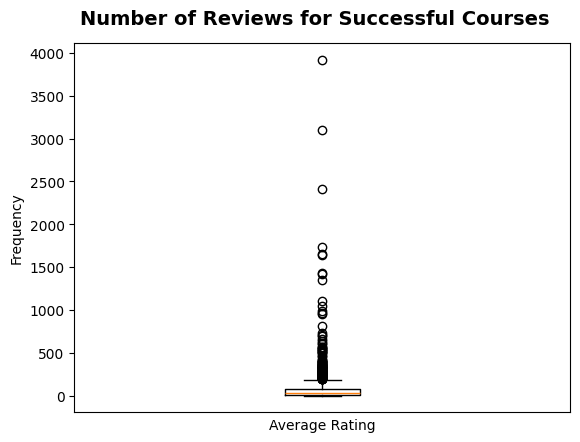

In [ ]:
### Number of Reviews

model_data['num_reviews'].describe()

plt.boxplot(model_data['num_reviews'])
plt.suptitle("Number of Reviews for Successful Courses", x= 0.5, y=0.95, fontweight='bold', fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.xticks([])
plt.show()

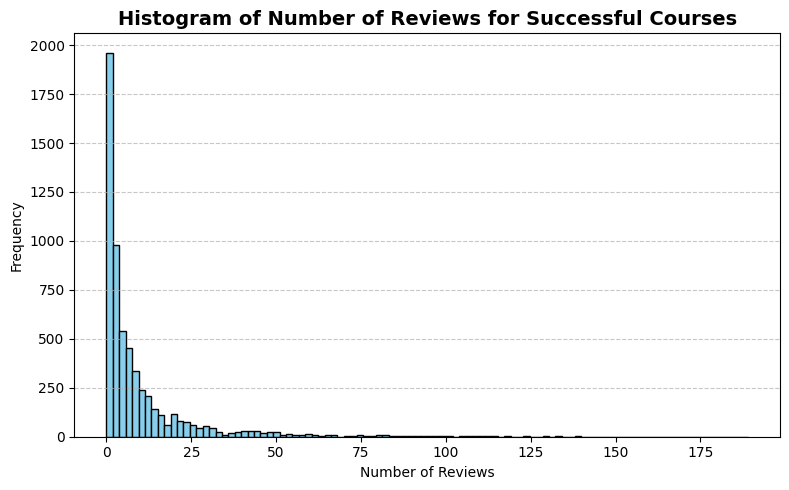

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(model_data2['num_reviews'], bins=100, color='skyblue', edgecolor='black')

plt.title('Histogram of Number of Reviews for Successful Courses', fontsize=14, fontweight='bold')

plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

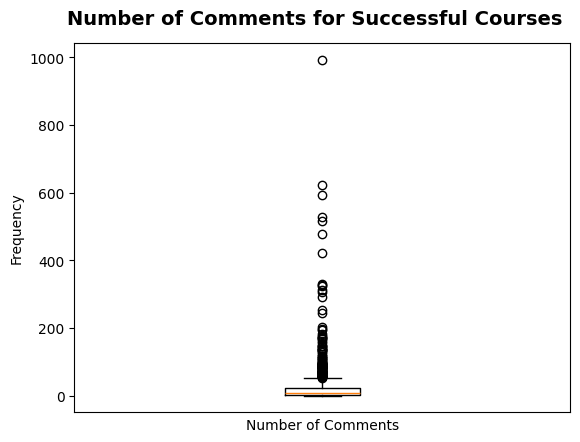

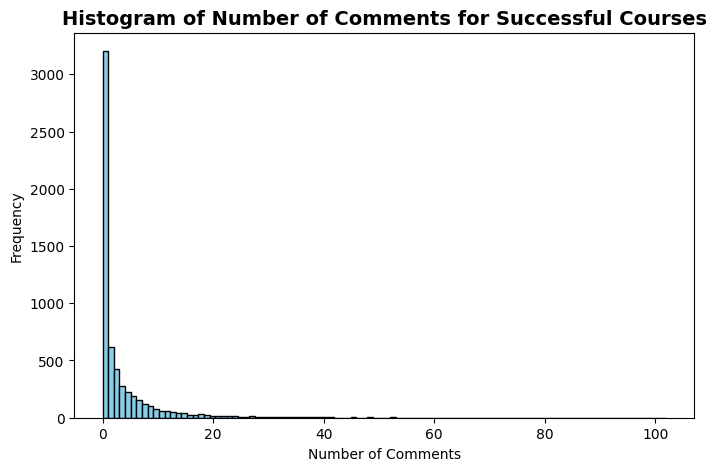

0.9200155986336436 0.0


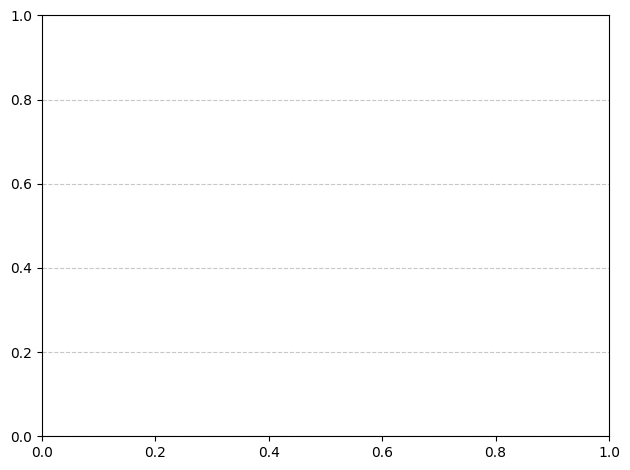

In [ ]:
### Number of Reviews

model_data['num_comments'].describe()

plt.boxplot(model_data['num_comments'])
plt.suptitle("Number of Comments for Successful Courses", x= 0.5, y=0.95, fontweight='bold', fontsize=14)
plt.xlabel("Number of Comments")
plt.ylabel("Frequency")
plt.xticks([])
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(model_data2['num_comments'], bins=100, color='skyblue', edgecolor='black')

plt.title('Histogram of Number of Comments for Successful Courses', fontsize=14, fontweight='bold')

plt.xlabel("Number of Comments")
plt.ylabel("Frequency")
plt.show()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

res = stats.spearmanr(model_data['num_reviews'], model_data['num_comments'])
print(res.statistic, res.pvalue)

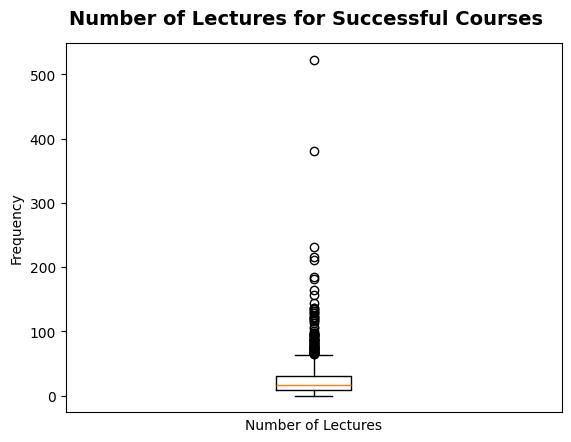

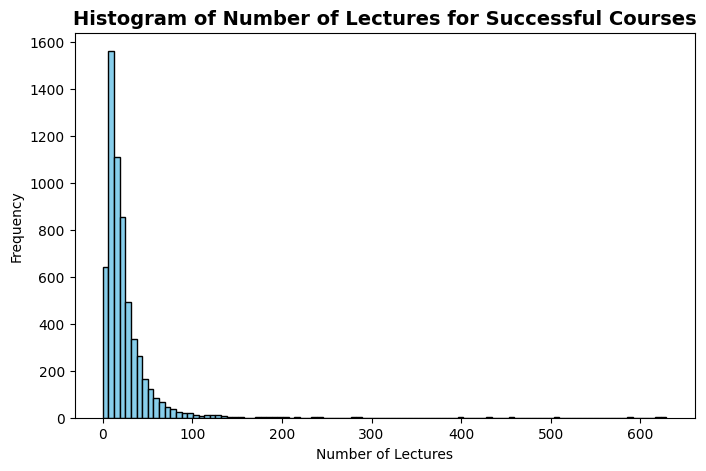

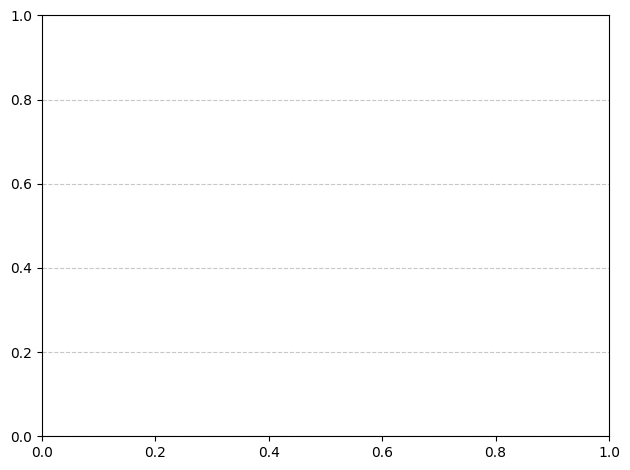

In [ ]:
### Number of Reviews

plt.boxplot(model_data['num_lectures'])
plt.suptitle("Number of Lectures for Successful Courses", x= 0.5, y=0.95, fontweight='bold', fontsize=14)
plt.xlabel("Number of Lectures")
plt.ylabel("Frequency")
plt.xticks([])
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(model_data2['num_lectures'], bins=100, color='skyblue', edgecolor='black')

plt.title('Histogram of Number of Lectures for Successful Courses', fontsize=14, fontweight='bold')

plt.xlabel("Number of Lectures")
plt.ylabel("Frequency")
plt.show()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, data3.shape, data2.shape

In [ ]:
# Finalizing training and test data

X_train_pd = pd.DataFrame(X_train, columns = X_coded.columns.values)
X_test_pd = pd.DataFrame(X_test, columns = X_coded.columns.values)
Y_train_pd = pd.DataFrame(y_train, columns = ['is_performing'])
Y_test_pd = pd.DataFrame(y_test, columns = ['is_performing'])

In [ ]:
X_train_pd.shape, X_test_pd.shape, Y_train_pd.shape, Y_test_pd.shape

In [ ]:
 X_train_pd.to_csv('XTrain', index=False)
 X_test_pd.to_csv('XTest', index=False)
 Y_train_pd.to_csv('YTrain', index=False)
 Y_test_pd.to_csv('YTest',index=False)

In [ ]:
# final_model_data.to_csv('final_model_data', index = False)